<a href="https://colab.research.google.com/github/Seunsoipe/Unsupervised-Learning-Checkpoint/blob/main/Unsupervised_Learning_Clustering_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective

This project requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

CUST_ID: Identification of Credit Card holder (Categorical)


BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 


PURCHASES: Amount of purchases made from account 


ONEOFF_PURCHASES: Maximum purchase amount done in one-go


 INSTALLMENTS_PURCHASES: Amount of purchase done in installment


 CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)


 ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance being paid 

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of Credit Card for user 

PAYMENTS: Amount of Payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

Instructions

Load your dataset. 

Use hierarchical clustering to identify the inherent groupings within your data.
1. Plot the clusters. 

2. Plot the dendrogram. Use k-means clustering. 

3. Try different k values and select the best one. 

4. Plot the clusters. 

Compare the two results. 

Bonus: search for another validation metric

In [4]:
import pandas as pd

In [3]:
from google.colab import files

Uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv


In [5]:
data = pd.read_csv('CC GENERAL.csv')

In [6]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Preprocessing

In [8]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
#Minumum Payments has 313 null values. We will fill it with its mean

#To get the mean

data['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [10]:
#To fill it with the mean

data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace = True)

In [11]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
#CREDIT_LIMIT has a null value. We will fill it with the mean

data['CREDIT_LIMIT'].mean()

4494.449450364621

In [13]:
#To fill with the mean

data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace = True)

In [14]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
#Let's drop CUST_ID 

data_new = data.drop(['CUST_ID'], axis = 1) #Where axis = 0 is Row and axis = 1 is Column

In [17]:
data_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
#Checking for outliers

import numpy as np

from scipy import stats

z = np.abs(stats.zscore(data_new)) #This convert to normal distribution

outliers = list(set(np.where(z >3)[0]))

len(outliers)

1516

## Hierarchal Clustering

In [40]:
#finding the number of Agglomerative clusters
Agg_score = []

for i in range(2,6):
    model = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage ='ward')
    pre = model.fit_predict(data_new)
    Agg_score = ss(data_new, pre)
    print(i, 'score is : ', Agg_score)
    

2 score is :  0.38374024907872517
3 score is :  0.3882658205329711
4 score is :  0.3814898651339935
5 score is :  0.3888192567233524


In [41]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

clust_labels=model.fit_predict(data_new)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [20]:
data_new['CLUSTER'] = clust_labels

data_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [21]:
cluster1 = data_new[data_new.CLUSTER ==0]
cluster2 = data_new[data_new.CLUSTER ==1]
cluster3 = data_new[data_new.CLUSTER ==2]
cluster4 = data_new[data_new.CLUSTER ==3]
cluster5 = data_new[data_new.CLUSTER ==4]
print(cluster1['CLUSTER'].value_counts())
print(cluster2['CLUSTER'].value_counts())
print(cluster3['CLUSTER'].value_counts())
print(cluster4['CLUSTER'].value_counts())
print(cluster5['CLUSTER'].value_counts())

0    460
Name: CLUSTER, dtype: int64
1    2974
Name: CLUSTER, dtype: int64
2    23
Name: CLUSTER, dtype: int64
3    5400
Name: CLUSTER, dtype: int64
4    93
Name: CLUSTER, dtype: int64


## Plotting the Clusters

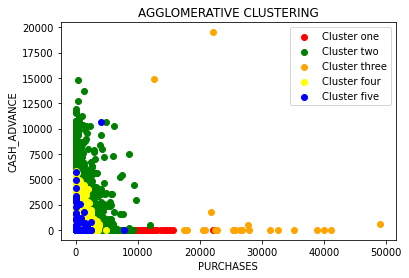

In [22]:
from matplotlib import pyplot as plt

plt.scatter(cluster1.PURCHASES, cluster1.PURCHASES_FREQUENCY, c = 'red', label = 'Cluster one')
plt.scatter(cluster2['PURCHASES'], cluster2['CASH_ADVANCE'], c = 'green', label = 'Cluster two')
plt.scatter(cluster3['PURCHASES'], cluster3['CASH_ADVANCE'], c = 'orange', label = 'Cluster three')
plt.scatter(cluster4['PURCHASES'], cluster4['CASH_ADVANCE'], c = 'yellow', label = 'Cluster four')
plt.scatter(cluster5['PURCHASES'], cluster5['CASH_ADVANCE'], c = 'blue', label = 'Cluster five')


plt.title('AGGLOMERATIVE CLUSTERING')
plt.xlabel('PURCHASES')
plt.ylabel('CASH_ADVANCE')
plt.legend()

## Plotting the Dendrogram

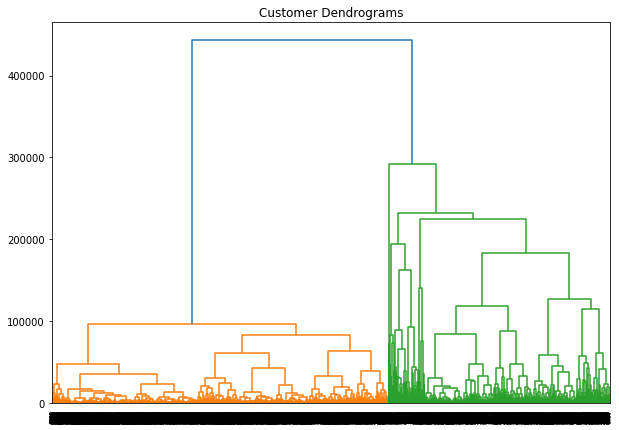

In [23]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data_new, method="ward"))

## K-Means

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as ss

#Using silhouete score to determine the best number of clusters

sil_score =[]
for i in range(2,7):
    kmeans = KMeans(n_clusters = i, random_state = 50) 
    k_predict = kmeans.fit_predict(data_new)
    sil_score = ss(data_new, k_predict)
    print(i, 'score is : ', sil_score)

2 score is :  0.5116392662697082
3 score is :  0.46707390840692603
4 score is :  0.398138287952887
5 score is :  0.39806404864231015
6 score is :  0.3719749533449023


In [30]:
centroids = kmeans.cluster_centers_

print(centroids)

[[5.29517857e+03 9.50609563e-01 1.65374927e+03 1.04021671e+03
  6.13621004e+02 2.57286215e+03 5.21341877e-01 3.11899641e-01
  3.70597765e-01 2.51957481e-01 6.71598415e+00 2.20766182e+01
  1.18731176e+04 2.52149637e+03 1.76079934e+03 9.32448639e-02
  1.16988111e+01 7.31836196e-01]
 [7.73580605e+02 8.48081935e-01 4.84663004e+02 2.31746996e+02
  2.53213044e+02 4.62250556e+02 4.47444415e-01 1.24990839e-01
  3.45704081e-01 1.08464505e-01 2.25591438e+00 9.18343973e+00
  2.16026380e+03 8.52279513e+02 5.52221490e+02 1.46320033e-01
  1.13696958e+01 2.95550131e+00]
 [5.40533094e+03 9.57954542e-01 2.72763637e+04 2.18771029e+04
  5.39926083e+03 1.55037839e+03 9.09027750e-01 8.42361167e-01
  7.20833292e-01 5.90277500e-02 2.50000000e+00 1.27958333e+02
  1.60833333e+04 2.79256345e+04 3.26667104e+03 5.11205792e-01
  1.19166667e+01 1.91666667e+00]
 [4.16650001e+03 9.17845007e-01 3.94776014e+03 2.45945965e+03
  1.48837851e+03 6.16444529e+03 5.53501184e-01 3.70198557e-01
  4.30934738e-01 3.48597784e-01 1

## K-means Cluster Counts

True     5327
False    3623
Name: Clusters, dtype: int64


Text(0.5, 1.0, 'Cluster Counts')

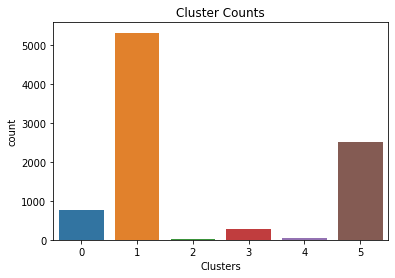

In [32]:
import seaborn as sb

data_new['Clusters'] = k_predict
print((data_new.Clusters ==1).value_counts())

sb.countplot(x = 'Clusters', data = data_new)
plt.title('Cluster Counts')

## Plotting the Clusters

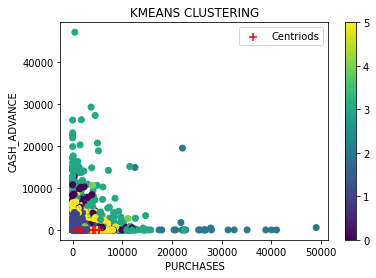

In [38]:
y = plt.scatter(data_new.PURCHASES, data_new.CASH_ADVANCE, c = data_new.Clusters)
plt.scatter(centroids[:,0], centroids[:,1], s = 80, c ='red', marker = '+' , label = "Centriods")

plt.title('KMEANS CLUSTERING')
plt.xlabel('PURCHASES')
plt.ylabel('CASH_ADVANCE')
plt.legend()
plt.colorbar(y)

## Elbow Method

Text(0.5, 1.0, 'Elbow method for Optimal K value')

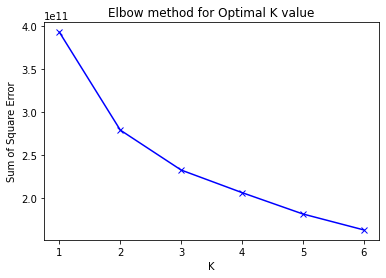

In [37]:
#Elbow Plot method is use to find the best number of clusters

k_range = range(1,7)
SSE = []# This is the sum of square error
for i in k_range:
    km = KMeans(n_clusters = i)
    km.fit(data_new)
    SSE.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_range, SSE, 'bx-')
plt.title('Elbow method for Optimal K value')

## Interpretation

With five groups, agglomerative clustering generated the highest silhouette score of 38% (0.388).

60% of all consumers fall under cluster 3, 33% fall under cluster 0, and the remaining clusters shared the remaining clients according to the Agglomerative clustering.

With two clusters, Kmeans clustering yields the highest silhouette score of 51%.

Similarly, cluster 2 was where the eblow graph for kmeans first appeared.

78% of all consumers fall under cluster 1 in the Kmeans clustering, whereas the remaining percentage falls under cluster 0.

Kmeans clustering outperformed agglomerative clustering in performance.